## Heart Disease Predition - Group 2

In [1]:
#importing necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data in
df = pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.describe(include = "all")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#null value check:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#following gives missing value percentage. 
def getMissingCount(data):
    missingCount = data.isnull().sum() * 100/ len(data)
    return missingCount

getMissingCount(df)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

###### Glucose has 10% missing values and the rest are below 10%. Hence we don't need to discard any field. We can impute.

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


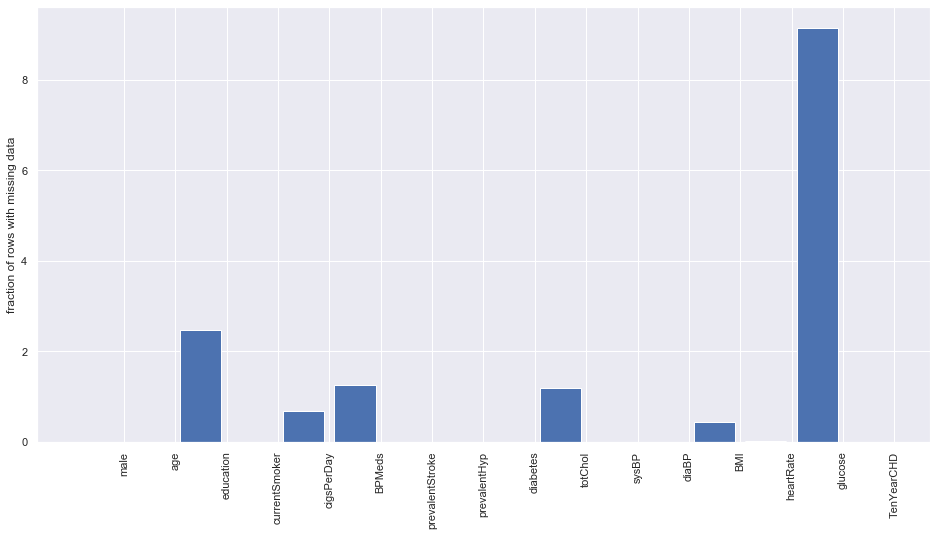

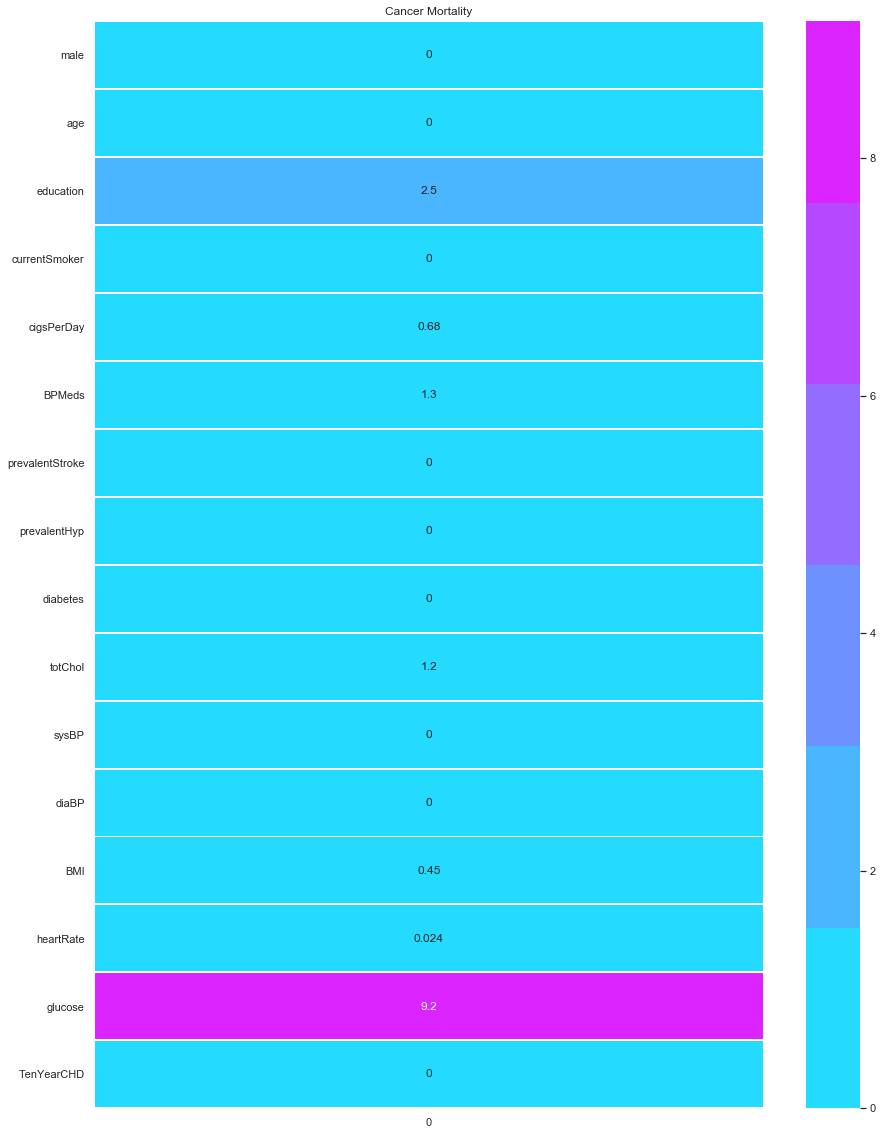

In [8]:
def visualizeMissingValue(data):
    missingCount = getMissingCount(data)
    #missingCount = data.isnull().sum()/ len(data)
    print(missingCount)
    plt.figure(figsize=(16, 8))
    plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
    plt.ylabel('fraction of rows with missing data')
    plt.bar(np.arange(len(missingCount)), missingCount)
    plt.show()

    plt.figure(figsize=(15, 20))
    sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
    cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
    plt.title("Cancer Mortality")
    plt.show()
# missingColumn = data.columns[data.isna().any()].tolist()
# print(missingColumn)
# msno.matrix(data.loc[:,['PctPrivateCoverageAlone']])
# msno.bar(data.loc[:,['PctPrivateCoverageAlone']], color="blue", log=False, figsize=(30, 18))
# msno.heatmap(data[missingColumn], figsize=(20, 20))
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

visualizeMissingValue(df)

In [9]:
def identifyColsToDrop(data, threshold=30.0):
    missingCols = getMissingCount(data)
    colsToDrop = missingCols[missingCols > threshold].index.values
    #colsToDrop = [col for (col, perc) in missingCols[missingCols > threshold].items()]
    return colsToDrop
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

def dropColumn(data, threshold):
    colsToDrop = self.identifyColsToDrop(data, threshold)
    data1 = data.drop(colsToDrop,axis=1)
    return data1
#except Exception as exp:
#err = self.errObj.handleErr(str(exp))
#print(str(err))

identifyColsToDrop(df)

array([], dtype=object)

###### We see that there aren't any nulls > 30 in any attribute

In [10]:
#checking for nulls > 80%
hf = df.isna().sum()
rows = df.count()[0]
Null_cols = hf[((hf*100/rows)>80.00)==True]*100/rows
Null_cols.count()

0

###### We don't have fields with nulls > 80% hence no elimination of attributes required

In [11]:
#Duplicates check:
len(df[df.duplicated()])

0

In [12]:
#checking for class imbalance problem:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

###### Our data has a class imbalance problem. Need to address this later

In [13]:
#checking for categorical data
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
        'diabetes', 'TenYearCHD'],
       dtype='object'),
 dtype('float64'): Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
        'heartRate', 'glucose'],
       dtype='object')}

###### Dataset doesn't have any categorical data that requires treatment

In [14]:
df.education.value_counts(dropna=False)

1.0    1720
2.0    1253
3.0     687
4.0     473
NaN     105
Name: education, dtype: int64

In [15]:
df.male.value_counts(dropna=False)

0    2419
1    1819
Name: male, dtype: int64

In [16]:
df.currentSmoker.value_counts(dropna=False)

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [17]:
df.prevalentStroke.value_counts(dropna=False)

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [18]:
df.prevalentHyp.value_counts(dropna=False)

0    2922
1    1316
Name: prevalentHyp, dtype: int64

In [19]:
df.diabetes.value_counts(dropna=False)

0    4129
1     109
Name: diabetes, dtype: int64

In [115]:
#Performing mean imputation on the fields that have nulls
df["education"].replace(np.nan, df["education"].astype("float32").mean(axis = 0), inplace = True)
df["cigsPerDay"].replace(np.nan, df["cigsPerDay"].astype("float32").mean(axis = 0), inplace = True)
df["BPMeds"].replace(np.nan, df["BPMeds"].astype("float32").mean(axis = 0), inplace = True)
df["totChol"].replace(np.nan, df["totChol"].astype("float32").mean(axis = 0), inplace = True)
df["BMI"].replace(np.nan, df["BMI"].astype("float32").mean(axis = 0), inplace = True)
df["glucose"].replace(np.nan, df["glucose"].astype("float32").mean(axis = 0), inplace = True)

In [24]:
from sklearn.impute import SimpleImputer
def imputeByMean(data, nonNumeric):
    imputedMean = SimpleImputer(strategy='mean') # for median imputation replace 'mean' with 'median'
    dataNumeric = data.drop(nonNumeric, axis=1)
    imputedMean.fit(dataNumeric)
    imputedData = imputedMean.transform(dataNumeric)

    d1 = pd.DataFrame(imputedData)
    d1.columns = dataNumeric.columns
    finalImputedData = pd.concat([d1, data.loc[:,nonNumeric]], axis=1)
## imputedData.columns = data.columns
    return finalImputedData
cols = df.columns
num_cols = df._get_numeric_data().columns
nonNumeric=list(set(cols) - set(num_cols))
imputeByMean(df,nonNumeric)




,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


In [116]:
#checking for outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4237.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721586,132.352407,82.893464,25.802007,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.026596,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
90%,1.000000,62.000000,4.000000,1.000000,25.000000,0.00000,0.000000,1.000000,0.000000,292.000000,162.000000,98.000000,30.763000,92.000000,97.000000,1.000000
95%,1.000000,64.000000,4.000000,1.000000,30.000000,0.00000,0.000000,1.000000,0.000000,312.000000,175.000000,104.575000,32.771500,98.000000,107.000000,1.000000
99%,1.000000,67.000000,4.000000,1.000000,43.000000,1.00000,0.000000,1.000000,1.000000,353.630000,200.000000,118.000000,38.952600,110.000000,170.000000,1.000000


###### When training, the following outliers can be treated: 
    cigsPerDay>43
    totChol>354
    BMI> 40
    glucose> 170

In [117]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['male', 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
        'diabetes', 'TenYearCHD'],
       dtype='object'),
 dtype('float64'): Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
        'heartRate', 'glucose'],
       dtype='object')}

In [118]:
#Converting all datatypes to integer for further processing
df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']] = df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']].astype(int)
#df[['heartRate']] = df[['heartRate']].astype(int)
#df.iloc[:,0:8] = df.iloc[:,0:8].astype(int)

In [119]:
#checking for any single value columns
def removeSingleValueColumns(data):
    d1 = data.copy()
    for col in d1.columns:
        if d1[col].nunique() == 1:
            d1 = d1.drop([col], axis=1)
    return d1

removeSingleValueColumns(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106,70,26,80.0,77,0
1,0,46,2,0,0,0,0,0,0,250,121,81,28,95.0,76,0
2,1,48,1,1,20,0,0,0,0,245,127,80,25,75.0,70,0
3,0,61,3,1,30,0,0,1,0,225,150,95,28,65.0,103,1
4,0,46,3,1,23,0,0,0,0,285,130,84,23,85.0,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179,92,25,66.0,86,1
4234,1,51,3,1,43,0,0,0,0,207,126,80,19,65.0,68,0
4235,0,48,2,1,20,0,0,0,0,248,131,72,22,84.0,86,0
4236,0,44,1,1,15,0,0,0,0,210,126,87,19,86.0,81,0


In [120]:
d1.shape

(4238, 16)

###### No single value colums are present hence no attributes were dropped

In [121]:
#Listing unique value counts in each feature
def getUniqueValues(data):
    colNames = data.columns
    listUnique = []
    for col in colNames:
        listUnique.append([col, data[col].nunique()])

    d1 = pd.DataFrame(listUnique)
    d1.columns = ['Feature Name', 'Unique Value']
    d1 = d1.sort_values(by='Unique Value', ascending=False)
    return d1

getUniqueValues(df)

,Feature Name,Unique Value
9,totChol,248
14,glucose,143
10,sysBP,134
11,diaBP,87
13,heartRate,73
1,age,39
4,cigsPerDay,33
12,BMI,33
2,education,4
0,male,2


In [122]:
#correlation analysis
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >=threshold) and (corr_matrix.columns[j] not in corr_col):
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
                    
    print(corr_col)
    return corr_col
    
corr_col = correlation(df,0.9)

set()


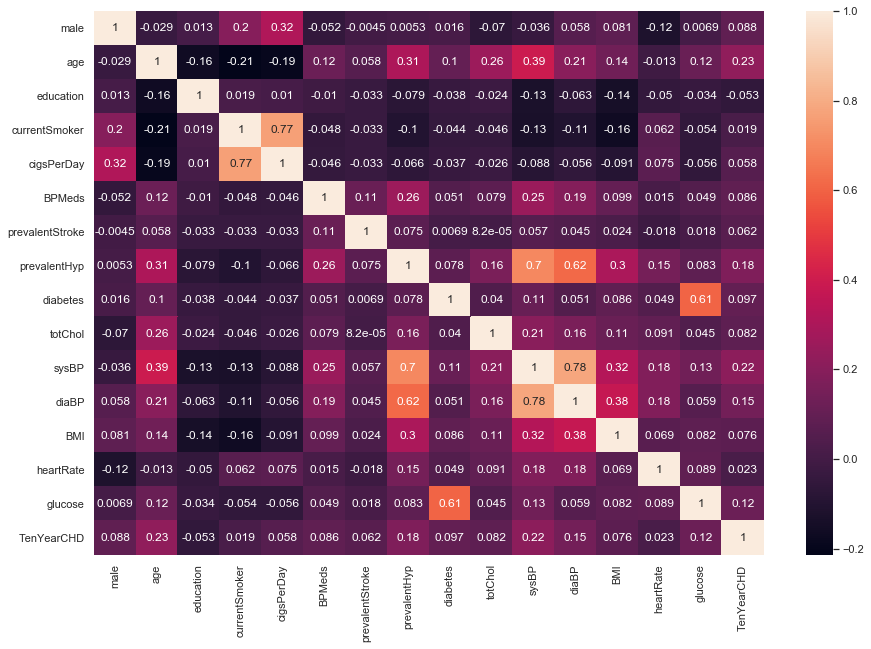

In [123]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


###### Neither of the attributes are highly correlated hence no requirement to drop any attributes

In [26]:
#scale data
from sklearn.preprocessing import MinMaxScaler
def minMaxScaler(data):
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(data)
    scaledData = pd.DataFrame(scaledData, columns=data.columns)
    return scaledData

minMaxScaler(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.349745,0.451537,0.465608,0.252787,0.222222,0.129944,1.0
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.169779,0.203310,0.338624,0.101066,0.212121,0.079096,0.0
4235,0.0,0.421053,0.333333,1.0,0.285714,NaN,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,0.000000,1.0,0.214286,0.0,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,NaN,0.0


In [28]:
def visualizeOutlier(scaledData):
# dataNumeric = data.drop(nonNumeric, axis=1)
    sns.boxplot(data=scaledData.iloc[:,0:15])

visualizeOutlier(scaledData)

NameError: name 'scaledData' is not defined

In [124]:
#Ways to split columns for test train
X = df.iloc[:, :-1].values # copy all columns excluding last column
Y = df.iloc[:, -1].values   # copy the last column only
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

#Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y_train)
print('before',counter)
smt=SMOTE()
X_train_sm, y_train_sm =smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print('after',counter)

ModuleNotFoundError: No module named 'imblearn'